# Miscellanea

In [1]:
import os
from pathlib import Path

# This is a terrible hack, and very unsafe
while not Path("config_data").exists():
    os.chdir("..")

In [2]:
print(os.getcwd())

/users/staff/enricot/slim


In [3]:
from pathlib import Path
from slim.simulation.config import Config
from slim.simulation.simulator import Simulator, _get_simulation_path, load_artifact
import ray
import numpy as np

def load_data(config_folder: str, sim_name: str, farms_per_process=1, **kwargs):
    quiet = kwargs.pop("quiet", False)
    orig_sim_name = sim_name
    sim_name = sim_name + "_" + str(kwargs)
    cfg_data_path = Path("config_data")
    cfg_data = cfg_data_path / "config.json"
    config_folder = cfg_data_path / config_folder
    outputs_path = Path("outputs") / orig_sim_name
    
    artifact = _get_simulation_path(outputs_path, sim_name)[0]
    print(artifact)
    if not artifact.exists():
        print(f"Artifact not yet generated, running {sim_name}")
        # defection_proba is farm-specific and needs special handling
        defection_proba = kwargs.pop("defection_proba", None)
        cfg = Config(cfg_data, config_folder, farms_per_process=farms_per_process, **kwargs)

        if defection_proba is not None:
            for farm in cfg.farms:
                farm.defection_proba = defection_proba
        
        sim = Simulator(outputs_path, sim_name, cfg)
        
        sim.run_model(quiet=quiet)
    return load_artifact(outputs_path, sim_name)

@ray.remote
def _launch(cfg_path, sim_name, **kwargs):
    return load_data(cfg_path, sim_name, **kwargs)
    
def generate_multiple_trials(config_folder: str, sim_name: str, **kwargs):
    seeds = [680, 346, 792, 901, 493, 131, 640,  59, 742, 703] # https://xkcd.com/221/
    tasks = [_launch.remote(config_folder, sim_name, quiet=True, seed=seed, **kwargs) for seed in seeds]
    return ray.get(tasks)
    #to_return = []
    #for seed in seeds:
    #    to_return.append(load_data(config_folder, sim_name, quiet=False, seed=seed, **kwargs))
    
    return to_return

In [4]:
bernoullis = [generate_multiple_trials("Linnhe_complete", "Linnhe_complete_bernoulli", treatment_strategy="bernoulli", defection_proba=i / 10)  for i in range(11)]

2022-06-06 15:05:10,744	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


(_launch pid=2277248) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 703, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.0}.pickle.lz4
(_launch pid=2277248) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 703, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.0}
(_launch pid=2277249) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 742, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.0}.pickle.lz4
(_launch pid=2277249) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 742, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.0}
(_launch pid=2277250) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 59, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.0}.pickle.lz4
(_launch pid=2277250) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 59, 'treatment_strategy': 'bernoulli', 'defectio

(_launch pid=2277251) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277251)   probas = config_matrix / sums


(_launch pid=2277243) Stopping farms
(_launch pid=2277241) Stopping farms


(_launch pid=2277244) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277244)   probas = config_matrix / sums


(_launch pid=2277250) Stopping farms


(_launch pid=2277243) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277243)   probas = config_matrix / sums
(_launch pid=2277250) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277250)   probas = config_matrix / sums
(_launch pid=2277241) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277241)   probas = config_matrix / sums


(_launch pid=2277235) Stopping farms
(_launch pid=2277248) Stopping farms


(_launch pid=2277235) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277235)   probas = config_matrix / sums


(_launch pid=2277240) Stopping farms


(_launch pid=2277248) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277248)   probas = config_matrix / sums


(_launch pid=2277238) Stopping farms


(_launch pid=2277240) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277240)   probas = config_matrix / sums
(_launch pid=2277238) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277238)   probas = config_matrix / sums


(_launch pid=2277249) Stopping farms


(_launch pid=2277249) /users/staff/enricot/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
(_launch pid=2277249)   probas = config_matrix / sums


(_launch pid=2277248) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 493, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.1}.pickle.lz4
(_launch pid=2277248) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 493, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.1}
(_launch pid=2277249) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 680, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.1}.pickle.lz4
(_launch pid=2277249) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 680, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.1}
(_launch pid=2277250) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 131, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.1}.pickle.lz4
(_launch pid=2277250) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 131, 'treatment_strategy': 'bernoulli', 'defect

2022-06-06 16:11:23,840	WARNING import_thread.py:135 -- The actor '_QueueActor' has been exported 100 times. It's possible that this warning is accidental, but this may indicate that the same remote function is being defined repeatedly from within many tasks and exported to all of the workers. This can be a performance issue and can be resolved by defining the remote function on the driver instead. See https://github.com/ray-project/ray/issues/6240 for more discussion.
2022-06-06 16:11:23,842	WARNING import_thread.py:135 -- The actor '_QueueActor' has been exported 100 times. It's possible that this warning is accidental, but this may indicate that the same remote function is being defined repeatedly from within many tasks and exported to all of the workers. This can be a performance issue and can be resolved by defining the remote function on the driver instead. See https://github.com/ray-project/ray/issues/6240 for more discussion.
2022-06-06 16:11:23,848	WARNING import_thread.py:135

(_launch pid=2277248) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 59, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.9}.pickle.lz4
(_launch pid=2277248) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 59, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.9}
(_launch pid=2277249) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 901, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.9}.pickle.lz4
(_launch pid=2277249) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 901, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.9}
(_launch pid=2277250) outputs/Linnhe_complete_bernoulli/simulation_data_Linnhe_complete_bernoulli_{'seed': 742, 'treatment_strategy': 'bernoulli', 'defection_proba': 0.9}.pickle.lz4
(_launch pid=2277250) Artifact not yet generated, running Linnhe_complete_bernoulli_{'seed': 742, 'treatment_strategy': 'bernoulli', 'defectio

In [5]:
mosaic = generate_multiple_trials("Linnhe_complete", "Linnhe_complete_mosaic", treatment_strategy="mosaic")

(_launch pid=2277248) outputs/Linnhe_complete_mosaic/simulation_data_Linnhe_complete_mosaic_{'seed': 131, 'treatment_strategy': 'mosaic'}.pickle.lz4
(_launch pid=2277248) Artifact not yet generated, running Linnhe_complete_mosaic_{'seed': 131, 'treatment_strategy': 'mosaic'}
(_launch pid=2277249) outputs/Linnhe_complete_mosaic/simulation_data_Linnhe_complete_mosaic_{'seed': 901, 'treatment_strategy': 'mosaic'}.pickle.lz4
(_launch pid=2277249) Artifact not yet generated, running Linnhe_complete_mosaic_{'seed': 901, 'treatment_strategy': 'mosaic'}
(_launch pid=2277250) outputs/Linnhe_complete_mosaic/simulation_data_Linnhe_complete_mosaic_{'seed': 742, 'treatment_strategy': 'mosaic'}.pickle.lz4
(_launch pid=2277250) Artifact not yet generated, running Linnhe_complete_mosaic_{'seed': 742, 'treatment_strategy': 'mosaic'}
(_launch pid=2277241) outputs/Linnhe_complete_mosaic/simulation_data_Linnhe_complete_mosaic_{'seed': 59, 'treatment_strategy': 'mosaic'}.pickle.lz4
(_launch pid=2277241) Ar

In [34]:
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import scipy.ndimage

from slim.simulation.lice_population import LicePopulation, geno_to_alleles
from slim.simulation.config import Config
from slim.types.treatments import Treatment, treatment_to_class

# TODO: this is largely copied from plots.py but largely simplified due to a (thankfully) better API.

def prepare_ax(ax, farm_name, ylabel="Lice Population", yscale="log", ylim=(1, 1e10), threshold=None, legend=True):
    ax.set_title(farm_name, fontsize=18)
    ax.grid(True, axis='y')
    if ylim:
        ax.set_ylim(*ylim)
    ax.set_yscale(yscale)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel("Days", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    if threshold:
        ax.axhline(threshold, linestyle="dashed", color="green", label="Controlled threshold")
    
    if legend:
        # avoid plottings dups
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        # ax.legend()

def get_treatment_regions(
    first_treatment_time, farm_df: pd.DataFrame
):
    # generate treatment regions
    # treatment markers
    #cm = pg.colormap.get("Pastel1", source="matplotlib", skipCache=True)
    #colors = cm.getColors(1)
    colors = cm.get_cmap("Pastel1")

    regions = []
    for treatment_idx in range(2):
        color = colors(treatment_idx, alpha=0.5)
        
        treatment_days_df = (
            farm_df[
                farm_df["current_treatments"].apply(
                    lambda l: bool(l[treatment_idx])
                )
            ]["timestamp"]
            - first_treatment_time
        )
        treatment_days = treatment_days_df.apply(lambda x: x.days).to_numpy()

        # Generate treatment regions by looking for the first non-consecutive treatment blocks.
        # There may be a chance where multiple treatments happen consecutively, on which case
        # we simply consider them as a unique case.
        # Note: this algorithm fails when the saving rate is not 1. This is not a problem as
        # precision is not required here.

        if len(treatment_days) > 0:
            treatment_ranges = []
            lo = 0
            for i in range(1, len(treatment_days)):
                if treatment_days[i] > treatment_days[i - 1] + 1:
                    range_ = (treatment_days[lo], treatment_days[i - 1])
                    #if range_[1] - range_[0] <= 2:
                    #    range_ = (range_[0] - 5, range_[0] + 5)
                    treatment_ranges.append(range_)
                    lo = i

            # since mechanical treatments are applied and effective for only one day we simulate a 10-day padding
            # This is also useful when the saving rate is not 1
            range_ = (treatment_days[lo], treatment_days[-1])
            #if range_[1] - range_[0] <= 2:
            #    range_ = (range_[0] - 5, range_[0] + 5)
            treatment_ranges.append(range_)

            regions.extend([(trange, treatment_idx, color) for trange in treatment_ranges])
    return regions

def plot_regions(ax, xs, regions):
    for region, treatment_idx, color in regions:
        label = treatment_to_class(Treatment(treatment_idx)).name + " treatment"
        if region[1] - region[0] <= 2:
            ax.axvline(region[0], 0, 1e20, linestyle=":", linewidth=3, label=label)
        else:
            ax.fill_between(xs, 0, 1e20, where=(region[0] <= xs) & (xs <= region[1]),
                        color=color, transform=ax.get_xaxis_transform(), label=label)

def get_trials(dfs, func, columns):
    total_per_df = []
    for df in dfs:
        total_per_df.append(func(df, columns))
    return pd.concat(total_per_df, axis=1)
    
def ribbon_plot(ax, xs, trials, label="", conv=7):
    min_interval = trials.min(axis=1).values
    max_interval = trials.max(axis=1).values
    mean_interval = trials.mean(axis=1).values
    
    kernel = np.full((conv,), 1/conv,)
    
    min_interval = scipy.ndimage.convolve(min_interval, kernel, mode='nearest')
    max_interval = scipy.ndimage.convolve(max_interval, kernel, mode='nearest')
    mean_interval = scipy.ndimage.convolve(mean_interval, kernel, mode='nearest')

    ax.plot(mean_interval, linewidth=2.5, label=label)
    ax.fill_between(xs, min_interval, max_interval, alpha=.3, label=label + " CI")
    
    for trial in trials:
        ax.plot(trial, linewidth=1.0, color='gray', alpha=0.8)

def plot_farm(farm_dfs, gross_ax, geno_ax, fish_ax, agg_ax, payoff_ax, reservoir_ax):
    farm_df = farm_dfs[0]
    stages = LicePopulation.lice_stages
    stages_readable= LicePopulation.lice_stages_bio_labels
    first_day = farm_df.iloc[0]["timestamp"]
    #regions = get_treatment_regions(first_day, farm_df)
    xs = np.arange(len(farm_df))
    alleles = geno_to_alleles(0)

    # total population
    def agg(df, stages):
        return sum(df[stage].apply(lambda x: sum(x.values())) for stage in stages)
        
    total_per_df = get_trials(farm_dfs, agg, stages)
    
    ribbon_plot(gross_ax, xs, total_per_df, "Overall lice population")
    prepare_ax(gross_ax, "Lice population")
    #plot_regions(gross_ax, xs, regions)
    
    # Per allele
    def agg(df, col):
        return df[col[0]]

    for allele in alleles:
        total_per_df = get_trials(farm_dfs, agg, [allele])
        ribbon_plot(geno_ax, xs, total_per_df, label=allele)

    prepare_ax(geno_ax, "By geno", legend=True)
    #plot_regions(geno_ax, xs, regions)
    
    # Fish population and aggregation
    def agg(df, col):
        return df[col[0]].apply(lambda x: sum(x) / len(x))
    
    farm_population = get_trials(farm_dfs, agg, ["fish_population"])
    farm_agg = get_trials(farm_dfs, agg, ["aggregation"])
    
    ribbon_plot(fish_ax, xs, farm_population, label="Fish population")
    #plot_regions(fish_ax, xs, regions)
    
    prepare_ax(fish_ax, "By fish population", ylabel="Fish population",
               ylim=(0, 15000), yscale="linear")
    
    ribbon_plot(agg_ax, xs, farm_agg, label="Aggregation")
    #plot_regions(agg_ax, xs, regions)
    
    prepare_ax(agg_ax, "By lice aggregation",
                    ylim=(0, 10), yscale="linear", threshold=6.0)

    # Payoff
    def agg(df, col):
        return df[col[0]].cumsum()
    
    payoff = get_trials(farm_dfs, agg, ["payoff"])
    ribbon_plot(payoff_ax, xs, payoff, label="Payoff")
    #plot_regions(payoff_ax, xs, regions)

    prepare_ax(payoff_ax, "Payoff", "Payoff (pseudo-gbp)", ylim=None, yscale="linear")
    
    
    # New eggs (reservoir)
    def agg(df, col):
        return pd.DataFrame(list(df[col[0]]))[col[1]]
    
    reservoir = get_trials(farm_dfs, lambda df, col: df[col[0]], ["new_reservoir_lice"])
    genos = ["a", "A", "Aa"]
    reservoir_ratios = [get_trials(farm_dfs, agg, ["new_reservoir_lice_ratios", geno]) for geno in genos]
    for i in range(3):
        ribbon_plot(reservoir_ax, xs, reservoir_ratios[i], label=genos[i])
    #plot_regions(reservoir_ax, xs, regions)

    prepare_ax(reservoir_ax, "Reservoir ratios", ylabel="Probabilities", ylim=(0, 1), yscale="linear")
    


def plot_data(dataframes, cfg: Config, title: str):
    dfs_per_farm = defaultdict(lambda: [])
    for df in dataframes:
        for x, y in df.reset_index().groupby("farm_id"):
            dfs_per_farm[x].append(y.reset_index())
    
    # lice-pop-agg    fish pop
    # lice-pop-stage  lice agg
    # farm payoff     
    width=26
    n = cfg.nfarms
    
    for i, (farm, farm_dfs) in enumerate(dfs_per_farm.items()):
        farm_name = cfg.farms[int(farm[len("farm_")])].name
        fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(width, 12/16 * width))
        fig.suptitle(farm_name, fontsize=30)
        plot_farm(farm_dfs, axs[0][0], axs[0][1], axs[1][0], axs[1][1], axs[2][0], axs[2][1])
        #fig.savefig(f"outputs/{title} {farm_name}.pdf")
        break
    #plt.close()

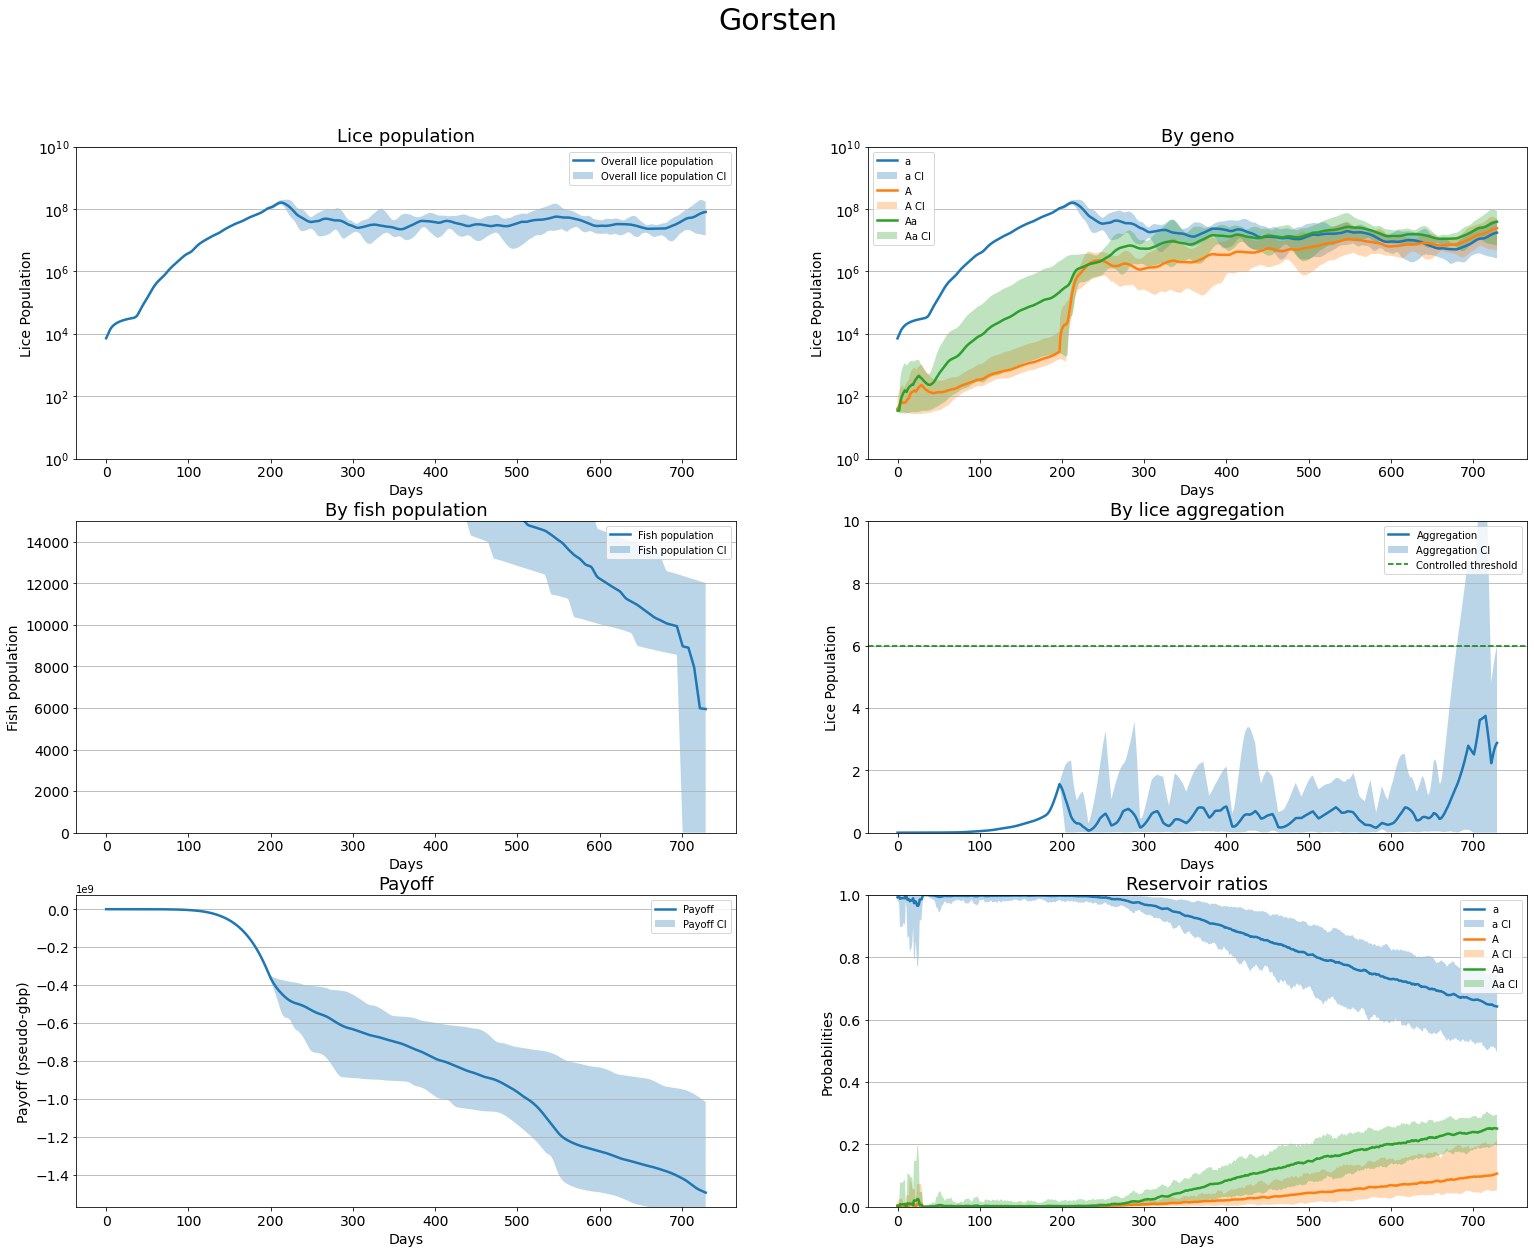

In [35]:
#%matplotlib agg
#%matplotlib inline
# config = Config("config_data/config.json", "config_data/Fyne_complete")

# Bernoulli
for i in range(11):
    p = i / 10
    trial_name = f"bernoulli with p={p}"
    trials = bernoullis[i]
    cfg = trials[0][2]
    trial_dfs = [t[0] for t in trials]
    plot_data(trial_dfs, cfg, trial_name)
    break

In [19]:
# Mosaic

cfg = mosaic[0][2]
trials = [t[0] for t in mosaic]
plot_data(trials, cfg, "Mosaic")